<a href="https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/shot%20prediction/video_shrinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Authenticate to GCS
from google.colab import auth
auth.authenticate_user()

In [3]:
!gsutil cp gs://rugby-videos/VID_20181215_095232.mp4 .

Copying gs://rugby-videos/VID_20181215_095232.mp4...
| [1 files][639.5 MiB/639.5 MiB]                                                
Operation completed over 1 objects/639.5 MiB.                                    


In [6]:
!ffmpeg -i VID_20181215_095232.mp4 -vf scale=160:-1 output_160.mp4

ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!pip install scikit-video --quiet

In [0]:
from skvideo.io import vread
import skvideo

In [9]:

data = vread('output_160.mp4')
data.shape

(13300, 90, 160, 3)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def draw_trail(video_data):
  
#   video_data = video_data_in[:,:,:,1]
  
#   print(video_data.shape)
  
  frames, height, width = video_data.shape

  trail_frame = np.zeros([height, width])

  for i in range( len(video_data)-1 ):

    base_frame = video_data[i].astype(np.int32)
    next_frame = video_data[i+1].astype(np.int32)

    delta = abs(base_frame - next_frame)
    
    change_mask = delta > 20
    
    trail_frame[change_mask] += 100

  trail_frame = np.clip(trail_frame, 0, 255).astype(np.uint8)
#   plt.figure(dpi=150)
#   plt.grid(False)
#   plt.imshow(trail_frame)
  return trail_frame

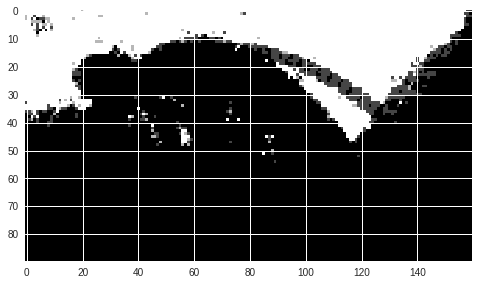

In [12]:
plt.imshow(draw_trail(data[:,:,:,0]))

In [0]:
window = 75
deltas = np.zeros([len(data)-window, data.shape[1], data.shape[2]])

for i in range(len(data)-window):
#   print(i, i+30)
  next_frame = draw_trail(data[i:i+window,:,:,0])
#   plt.imshow(next_frame)
  deltas[i] = next_frame

In [14]:
deltas.shape

(13225, 90, 160)

In [0]:
skvideo.io.vwrite('deltas_160.mp4', deltas)

In [16]:
!gsutil cp deltas_160.mp4 gs://rugby-videos/deltas_160.mp4

Copying file://deltas_160.mp4 [Content-Type=video/mp4]...
/ [1 files][  2.2 MiB/  2.2 MiB]                                                
Operation completed over 1 objects/2.2 MiB.                                      
